# Problem 1 - Digit Recognizer

### Imports

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### The dataset

In [15]:
data = np.load('dataset.npz')
X = data['X']
y = data['y']

labels_dict = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: 'A',
    11: 'B',
    12: 'C',
    13: 'D',
    14: 'E',
    15: 'F',
    16: 'empty'
}

### Splitting the dataset

In [64]:
seed = 13
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

2951


### Visualizing data

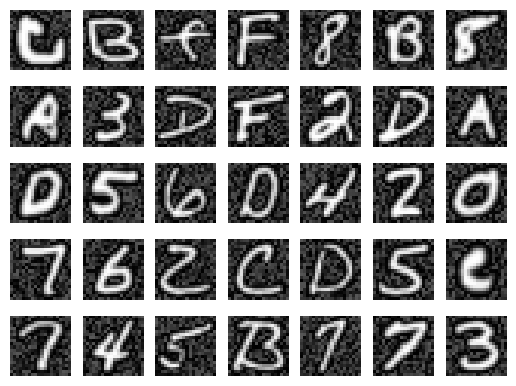

In [17]:
fig, axes = plt.subplots(5, 7)
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    ax.axis('off')
plt.show()

### Visualizing data by class

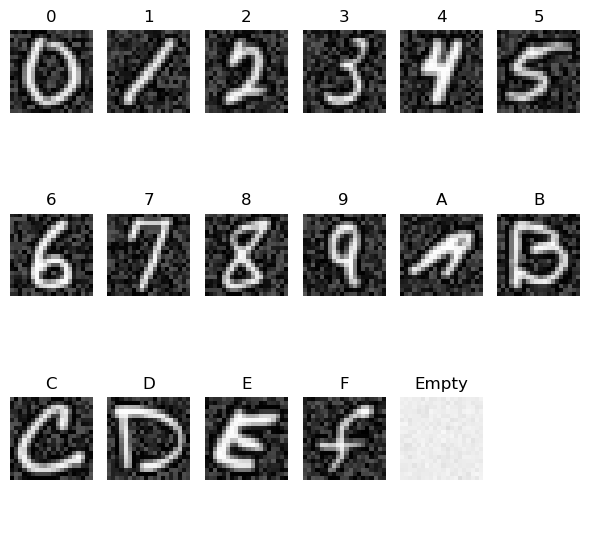

In [22]:
fig, axes = plt.subplots(3, 6, figsize=(6, 6))
axes = axes.ravel()
np.random.seed(42)

for class_label in range(17):
    class_indices = np.where(y_train == class_label)[0]
    random_index = np.random.choice(class_indices)
    
    axes[class_label].imshow(X_train[random_index].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
    axes[class_label].axis('off')
    axes[class_label].set_title(labels_dict[class_label])
    
axes[i].axis('off')    
plt.tight_layout()
plt.show()

### Data Preprocessing

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model selection - Classifier 1

Here I use SVM

In [62]:
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_svc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best parameters for SVM:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

y_pred_svc = best_svc.predict(X_test)
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svc)}")

Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       188
           1       0.92      0.96      0.94        69
           2       0.93      0.89      0.91       158
           3       0.94      0.95      0.94       285
           4       0.88      0.91      0.89       150
           5       0.95      0.90      0.93       209
           6       0.97      0.97      0.97       274
           7       0.93      0.94      0.94       182
           8       0.90      0.88      0.89       128
           9       0.95      0.87      0.91        61
          10       0.91      0.95      0.93       248
          11       0.90      0.85      0.87       157
          12       0.94      0.97      0.95       285
          13       0.89      0.93      0.91       273
          14       0.93      0.59      0.72        22
          15       0.87      0.89     

### Model selection - Classifier 2

Here I use Random forest

In [63]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       188
           1       0.92      0.84      0.88        69
           2       0.94      0.59      0.73       158
           3       0.71      0.94      0.81       285
           4       0.77      0.75      0.76       150
           5       0.82      0.64      0.72       209
           6       0.80      0.92      0.85       274
           7       0.72      0.92      0.81       182
           8       0.80      0.55      0.65       128
           9       1.00      0.07      0.12        61
          10       0.71      0.96      0.81       248
          11       0.74      0.48      0.58       157
          12       0.74      0.96      0.84       285
          13       0.74      0.80      0.77       273
          14       0.00      0.00      0.00        22
          15       0.87  

### Classifier Evaluation

In [60]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Test Accuracy: {svc_accuracy:0.3f}")
print(f"Random Forest Test Accuracy: {rf_accuracy:0.3f}")

best_model = best_svc

SVM Test Accuracy: 0.925
Random Forest Test Accuracy: 0.775


### Vizulize the predicted data with confusion matrix
// Remove before delivering

How to read the table: 
- Take the value at row 0, column 0, which is 140. This means that for 140 instances, the true label was 0, and the classifier also predicted 0.
- Now, look at row 0, column 14, which is 30. This means that for 30 instances, the true label was 0, but the classifier incorrectly predicted label 14. 

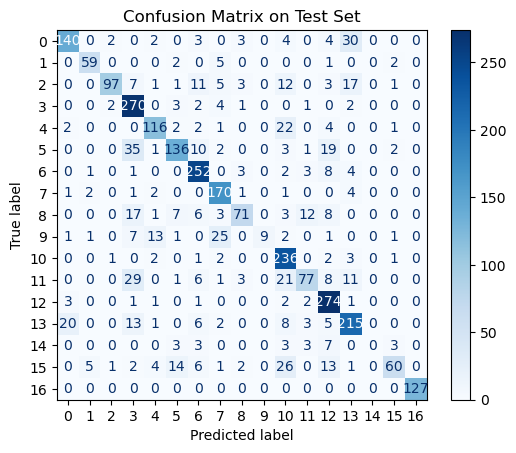

In [29]:
y_pred_test = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.show()

### Testing the classifier agianst the unseen data

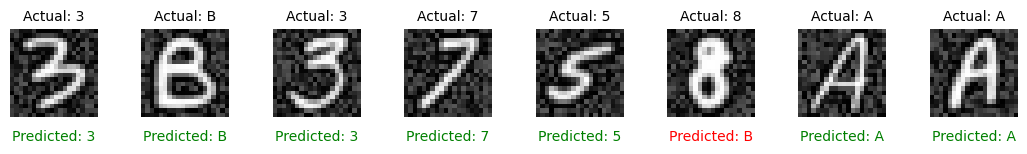

In [72]:
num_samples = 8
indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[indices]
sample_true_labels = y_test[indices]
sample_predicted_labels = y_pred_svc[indices]

fig, axes = plt.subplots(1, num_samples, figsize=(13, 4))  
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(sample_images[i].reshape(20, 20), cmap='gray')
    ax.axis('off')

    actual = labels_dict[sample_true_labels[i]]
    predicted = labels_dict[sample_predicted_labels[i]]

    if actual == predicted:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(f"Actual: {actual}", fontsize=10)
    ax.text(0.5, -0.15, f"Predicted: {predicted}", fontsize=10, color=color, ha='center', va='top', transform=ax.transAxes)

plt.subplots_adjust(wspace=0.5) 

plt.show()

# Problem 2: Dimensionality Reduction

In [ ]:
#TODO

# Problem 3: Detecting Out-of-Distribution Images

### The dataset

In [ ]:
corrupted_data = np.load('corrupt_dataset.npz')
X_corrupted = corrupted_data['X']